# Question - 3

In [198]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d
import matplotlib.axes as axes

### Generating The Function points for the plot

In [199]:
def q3_function(parameters):
    x = parameters[0]
    y = parameters[1]
    t = x**2 + y**2
    return (50/9*(t**3) - 209/18*(t**2) + 59/9*(t))
def gradient_function(parameters):
    x = parameters[0]
    y = parameters[1]
    t = x**2 + y**2
    t_dx = x*2 
    t_dy = y*2
    f_dt = (150*(t**2) - 209*t + 59)/9
    return np.array([t_dx*f_dt, t_dy*f_dt])
def generate_points(n, t):
    '''
    We shall use this function to generate the points with random initialisation 
    as mentioned in the question. We shall take the points from the range ...
    [-10, 10]^2
    x is the 1st argument
    y is the 2nd argument
    '''
    training_set_x = []
    training_set_y = []
    for i in range(n):
        training_set_x += [[random.uniform(-t, t), random.uniform(-t, t)]]
        training_set_y += [q3_function(training_set_x[i])]
    training_set_y = np.array(training_set_y)
    training_set_x = np.array(training_set_x)
    return training_set_x, training_set_y
data_points = 500
t = 3
training_set_x, training_set_y = generate_points(data_points, t)

In [200]:
pd.DataFrame(training_set_y)

,0
0,19.654566
1,1154.836672
2,5538.738575
3,671.928434
4,237.280566
...,...
495,414.598384
496,77.792748
497,12163.908987
498,1869.258644


In [201]:
pd.DataFrame(training_set_x)

,0,1
0,-0.980258,-1.139948
1,-1.392625,2.166835
2,-2.361852,-2.262066
3,1.897959,-1.434019
4,1.815693,-0.958026
...,...,...
495,-1.011365,-1.975628
496,-1.493989,0.951245
497,2.560921,2.670271
498,-2.016562,1.896744


In [202]:
def plot_points(training_set_x, training_set_y):
    # fig = plot.figure()
    # ax = plot.axes(projection = '3d', )
    # ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color = 'black')
    z = []
    for i in range(len(training_set_x)):
        for j in range(len(training_set_x)):
            temp_dict = dict()
            temp_dict['x'] = training_set_x[i][0]
            temp_dict['y'] = training_set_x[j][1]
            temp_dict['function'] = q3_function(np.array([training_set_x[i][0], training_set_x[j][1]]))
            z += [temp_dict]
    return z
temp = pd.DataFrame(plot_points(training_set_x, training_set_y))
temp

,x,y,function
0,-0.980258,-1.139948,19.654566
1,-0.980258,2.166835,670.875588
2,-0.980258,-2.262066,858.244615
3,-0.980258,-1.434019,66.682729
4,-0.980258,-0.958026,8.173092
...,...,...,...
249995,1.437315,-1.975628,806.925099
249996,1.437315,0.951245,62.657172
249997,1.437315,2.670271,3399.045814
249998,1.437315,1.896744,673.914868


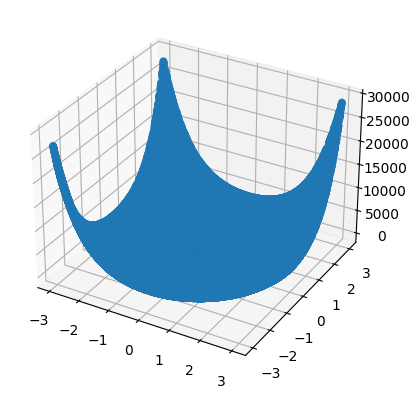

In [203]:
fig = plot.figure()
ax = plot.axes(projection='3d',)
plot.plot(0, 0, 0, 'ro')
ax.scatter3D(list(temp['x']), list(temp['y']), list(temp['function']))
plot.savefig('./function_plot.png')
plot.show()

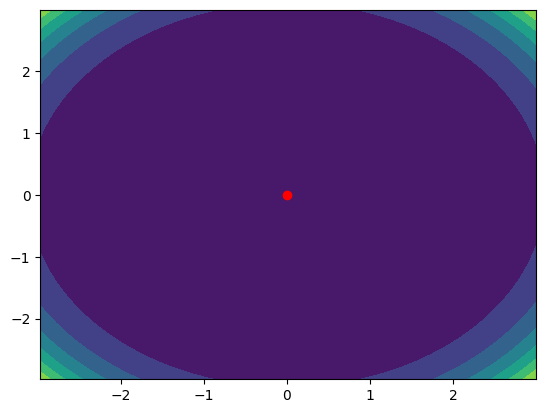

In [204]:
fig = plot.figure()
plot.plot(0, 0, 0, 'ro')
plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
plot.savefig('./contour_plot.png')
plot.show()

In [205]:
def contour_plot(seq_1, loss_seq_1, ground_truth):
    fig = plot.figure()
    ax = plot.axes()
    x = list(seq_1[0])
    y = list(seq_1[1])
    z = loss_seq_1
    plot.plot(ground_truth[0], ground_truth[1], 'yo')
    plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
    for i in range(len(seq_1)-1):
        plot.arrow(x=x[i], y =y[i], dx = x[i+1] - x[i], dy = y[i+1] - y[i], width=0.01)
    plot.tight_layout()
    plot.show()

### Question - 3.1 - Gradient Descent
#### Parameters

In [206]:
epochs = 10000
learning_rate = 0.001 # Is kind of safe learning rate
max_limit_1 = 2
# w_init = np.array([random.uniform(-1*max_limit_1, max_limit_1), random.uniform(-1*max_limit_1, max_limit_1)])
w_init = np.array([0.45, 0.25])
tolerence = 0.0001

In [207]:
def gradient_descent_step(weight_now, learning_rate, tolerence):
    gradient = gradient_function(weight_now)
    weight_new = weight_now - learning_rate*gradient
    loss = q3_function(weight_new)
    if(loss < tolerence):
        print("Loss: ", loss)
        return weight_new, loss, 0
    return weight_new, loss, 1

#### Performance

In [208]:
w_now = w_init
print("Initial Parameters:")
print(w_init)
seq_1 = []
loss_seq_1 = []
for i in range(epochs):
    seq_1 += [w_now]
    w_now, loss, cont = gradient_descent_step(w_now, learning_rate=learning_rate, tolerence=tolerence)
    loss_seq_1 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("Epochs", epochs)
print("Final Paramters")



Initial Parameters:
[0.45 0.25]
Loss:  9.833727258934972e-05
Epochs:  434
Final Paramters


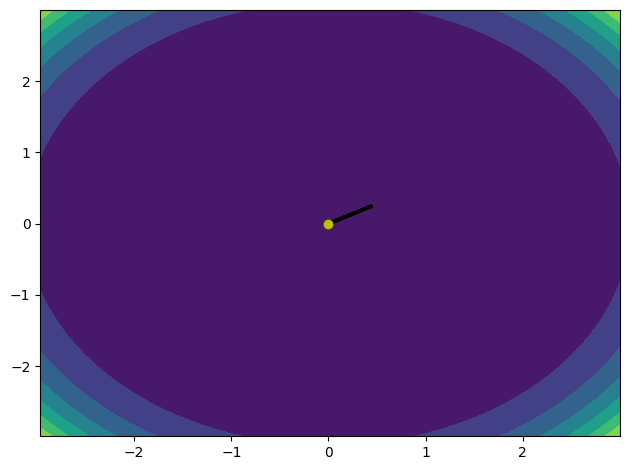

In [209]:
if(not cont):
    seq_1 = pd.DataFrame(seq_1)
    ground_truth = [0, 0]
    contour_plot(seq_1, loss_seq_1, ground_truth)

### Question - 3.2 - Polyak Momentum Update
#### Parameters

In [210]:
epochs = 10000
learning_rate = 0.001
beta = 0.8
tolerence = 0.0001
max_limit_2 = 1
w_init = w_init
mom_init = np.array([0, 0])

In [211]:
def polyak_update(w_now, mom_now, learning_rate, beta, tolerence):
    '''
    For a given value of weight, momentum, it does a polyak momentum
    and returns the new weight, momentum, and loss
    '''
    mom_new = beta*mom_now - learning_rate*gradient_function(w_now)
    w_new = w_now + mom_new
    loss = q3_function(w_new)
    if(loss < tolerence):
        print("Loss: ")
        print(loss)
        return w_new, mom_new, loss, 0
    return w_new, mom_new, loss, 1

#### Performance

In [212]:
seq_2 = []
loss_seq_2 = []
w_now = w_init
mom_now = mom_init
print("Initial Paramters: ")
print(w_init)
for i in range(epochs):
    seq_2 += [w_now]
    w_now, mom_now, loss, cont = polyak_update(w_now, mom_now, learning_rate, beta, tolerence)
    loss_seq_2 += [loss]
    if(not cont):
        print("Epochs:", i+1)
        break
if(cont):
    print("Epochs:", loss)
print("Final Parameters:")
print(w_now)

Initial Paramters: 
[0.45 0.25]
Loss: 
7.443669102996137e-05
Epochs: 69
Final Parameters:
[0.00294566 0.00163648]


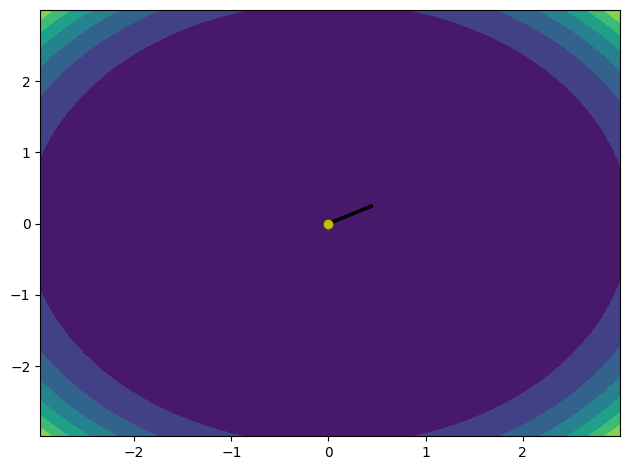

In [213]:
if(not cont):
    ground_truth = [0, 0]
    seq_2 = pd.DataFrame(seq_2)
    contour_plot(seq_2, loss_seq_1, ground_truth)

### Question  - 3.3. - Nesterov Accelerated Gradient
#### Parameters

In [214]:
epochs = 10000
learning_rate = 0.0009
beta = 0.8
w_now = w_init
tolerence = 0.001
mom_init = np.array([0, 0])
mom_now = mom_init

In [215]:
def nesterov_update(w_now, mom_now, learning_rate, beta, tolerence):
    mom_new = beta*mom_now - learning_rate*gradient_function(w_now + beta*mom_now)
    w_new = w_now + mom_new
    loss = q3_function(w_new)
    if(loss < tolerence):
        print("Loss: ")
        print(loss)
        return w_new, mom_new, loss, 0
    return w_new, mom_new, loss, 1

#### Performance

In [216]:
seq_3 = []
loss_seq_3 = []
print("Initial Paramters:")
print(w_now)
for i in range(epochs):
    seq_3 += [w_now]
    w_now, mom_now, loss, cont = nesterov_update(w_now, mom_now, learning_rate, beta, tolerence)
    loss_seq_3 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("Epochs:", epochs)
print("Final Parameters")
print(w_now)

Initial Paramters:
[0.45 0.25]
Loss: 
0.0008732592568543853
Epochs:  71
Final Parameters
[0.01009038 0.00560577]


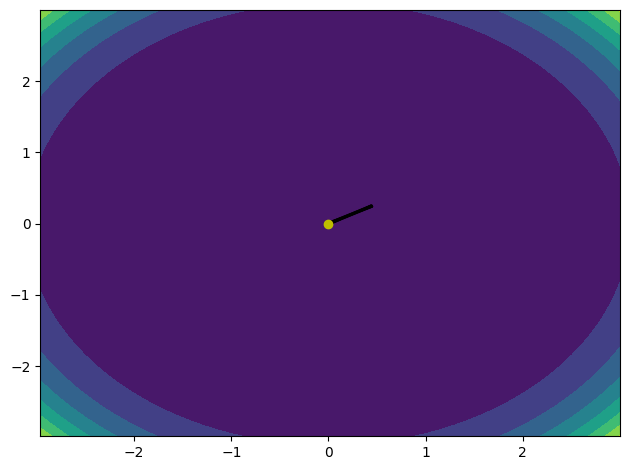

In [217]:
if(not cont):
    ground_truth = [0, 0]
    seq_3 = pd.DataFrame(seq_3)
    contour_plot(seq_3, loss_seq_3, ground_truth)

### Question - 3.4 - Adam Optimizer
#### Parameters

In [249]:
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-08
learning_rate = 0.22
w_now = w_init
# w_now = np.array([0.5, 0])
mom_now = mom_init
mom_s_now = np.array([0, 0])
tolerence = 0.001

In [250]:
def adam_update(w_now, mom_now, mom_s_now, learning_rate, tolerence, beta_1, beta_2, epsilon, iteration):
    gradient = gradient_function(w_now)
    mom_new = beta_1*mom_now + (1- beta_1)*(gradient)
    mom_s_new = beta_2*(mom_s_now) + (1 - beta_2)*(gradient**2)
    w_new = [0]*len(w_now)
    for i in range(len(w_new)):
        w_new[i] = w_now[i] - (learning_rate*(mom_new[i])/(np.sqrt(mom_s_new[i]) + epsilon))
    # print(w_new)
    w_new = np.array(w_new)
    # w_new = w_now - learning_rate*(alpha*mom_new)/(np.sqrt(mom_s_new + epsilon))
    loss = q3_function(w_new)
    if(loss < tolerence):
        print("Loss:")
        print(loss)
        return w_new, mom_new, mom_s_new,loss, 0
    return w_new, mom_new, mom_s_new,loss,  1

#### Performance

In [251]:
seq_4 = []
loss_seq_4 = []
print("Initial Paramters:")
print(w_now)
# print(w_now, mom_now, mom_s_now, learning_rate, tolerence, beta_1, beta_2, alpha, epsilon)
for i in range(epochs):
    seq_4 += [w_now]
    w_now, mom_now, mom_s_now, loss, cont = adam_update(w_now, mom_now, mom_s_now, learning_rate, tolerence, beta_1, beta_2, epsilon, i+1)
    loss_seq_4 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("No Convergence")
else:
    print("Final Parameters")
    print(w_now)    

Initial Paramters:
[0.45 0.25]
Loss:
0.00041544256508909273
Epochs:  52
Final Parameters
[0.00689399 0.00398153]


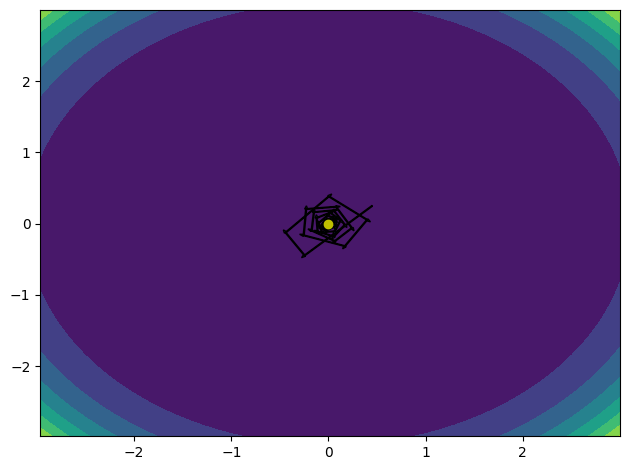

In [252]:
if(not cont):
    ground_truth = [0, 0]
    seq_4 = pd.DataFrame(seq_4)
    contour_plot(seq_4, loss_seq_4, ground_truth)

Notes: 
1. The same overflow problem that has been encountered in the second question has been encountered here too. Hence, the initial points have been chosen carefully.
2. If the point is chose near the circle, the convergence occurs near the circle itself. (x^2 + y^2 = 1)
3. If the point is chosen near the origin, then the convergence, occurs at the origin. 
